In [1]:
import pandas as pd
import sys
from sklearn import preprocessing

sys.path.append("../libs")
from esnlib import *
from helpers import *

import os

# One out

# Canela

In [2]:
canela_path = "../../data/processed/x_potency_canela1_merged.csv"

In [3]:
train_perc = 0.8
preprocess = "minmax"

best_params = pd.read_csv("../../results/best_esn/canela1_one_esn.csv", index_col=0)
best_params["n_reservoir"] = best_params["n_reservoir"].astype("int64")
best_params["lags"] = best_params["lags"].astype("int64")

for i,param in best_params.iterrows():
    print("Reading Data")
    #Data split parameters

    filename = os.path.basename(canela_path).split("_")[2]
    X = pd.read_csv(canela_path,index_col=0).values[:,:int(param.lags)]
    y = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0).values[:,0].reshape(-1,1)
    y_multi = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0).values
    trainlen = int(train_perc*len(X))
    X_train,X_test = X[:trainlen], X[trainlen:]
    y_train,y_test = y[:trainlen], y[trainlen:]
    y_train_multi, y_test_multi =y_multi[:trainlen], y_multi[trainlen:]
    y_train_orig  = y_train
    
    
    if preprocess == "minmax":
        minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
        minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

        minmax_in.fit(X_train)
        minmax_out.fit(y_train)

        preproc_in = minmax_in
        preproc_out = minmax_out

    else:
        standarization_in = preprocessing.StandardScaler()
        standarization_out = preprocessing.StandardScaler()

        standarization_in.fit(X_train)
        standarization_out.fit(y_train)

        preproc_in = standarization_in
        preproc_out = standarization_out

    X_train = preproc_in.transform(X_train) if preproc_in else X_train
    X_test = preproc_in.transform(X_test) if preproc_in else X_test
    y_train = preproc_out.transform(y_train) if preproc_out else y_train

    param = param.drop("scores")
    lags = int(param.lags)
    param = param.drop("lags")
    n_reservoir = param.n_reservoir
    param = param.drop("n_reservoir")
    print("Training ESN")
    clf = ESN(random_state=42, **param)
    clf.fit(X_train,y_train)
    print("Predicting Train")
    y_pred_train = clf.n_predict(X_train)
    for i in range(12):
         y_pred_train[:,i] = preproc_out.inverse_transform(y_pred_train[:,i].reshape(-1,1)).reshape((-1))
    
    print("Predicting Test")
    y_pred_test = clf.n_predict(X_test,cont=True)
    for i in range(12):
         y_pred_test[:,i] = preproc_out.inverse_transform(y_pred_test[:,i].reshape(-1,1)).reshape((-1))
            
    pd.DataFrame(y_pred_train).to_csv("canela1_y_pred_train_one_{}lags.csv".format(lags))
    pd.DataFrame(y_pred_test).to_csv("canela1_y_pred_test_one_{}lags.csv".format(lags))
    pd.DataFrame(y_train_multi).to_csv("canela1_y_train_one_{}lags.csv".format(lags))
    pd.DataFrame(y_test_multi).to_csv("canela1_y_test_one_{}lags.csv".format(lags))

Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test


# Totoral

In [4]:
canela_path = "../../data/processed/x_potency_totoral_merged.csv"
train_perc = 0.8
preprocess = "minmax"

best_params = pd.read_csv("../../results/best_esn/totoral_one_esn.csv", index_col=0)
best_params["n_reservoir"] = best_params["n_reservoir"].astype("int64")
best_params["lags"] = best_params["lags"].astype("int64")

for i,param in best_params.iterrows():
    print("Reading Data")
    #Data split parameters

    filename = os.path.basename(canela_path).split("_")[2]
    X = pd.read_csv(canela_path,index_col=0).values[:,:int(param.lags)]
    y = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0).values[:,0].reshape(-1,1)
    y_multi = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0).values
    trainlen = int(train_perc*len(X))
    X_train,X_test = X[:trainlen], X[trainlen:]
    y_train,y_test = y[:trainlen], y[trainlen:]
    y_train_multi, y_test_multi =y_multi[:trainlen], y_multi[trainlen:]
    y_train_orig  = y_train
    
    
    
    if preprocess == "minmax":
        minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
        minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

        minmax_in.fit(X_train)
        minmax_out.fit(y_train)

        preproc_in = minmax_in
        preproc_out = minmax_out

    else:
        standarization_in = preprocessing.StandardScaler()
        standarization_out = preprocessing.StandardScaler()

        standarization_in.fit(X_train)
        standarization_out.fit(y_train)

        preproc_in = standarization_in
        preproc_out = standarization_out

    X_train = preproc_in.transform(X_train) if preproc_in else X_train
    X_test = preproc_in.transform(X_test) if preproc_in else X_test
    y_train = preproc_out.transform(y_train) if preproc_out else y_train

    param = param.drop("scores")
    lags = int(param.lags)
    param = param.drop("lags")
    n_reservoir = param.n_reservoir
    param = param.drop("n_reservoir")
    print("Training ESN")
    clf = ESN(random_state=42, **param)
    clf.fit(X_train,y_train)
    print("Predicting Train")
    y_pred_train = clf.n_predict(X_train)
    for i in range(12):
         y_pred_train[:,i] = preproc_out.inverse_transform(y_pred_train[:,i].reshape(-1,1)).reshape((-1))
    
    print("Predicting Test")
    y_pred_test = clf.n_predict(X_test,cont=True)
    for i in range(12):
         y_pred_test[:,i] = preproc_out.inverse_transform(y_pred_test[:,i].reshape(-1,1)).reshape((-1))
            
    pd.DataFrame(y_pred_train).to_csv("totoral_y_pred_train_one_{}lags.csv".format(lags))
    pd.DataFrame(y_pred_test).to_csv("totoral_y_pred_test_one_{}lags.csv".format(lags))
    pd.DataFrame(y_train_multi).to_csv("totoral_y_train_one_{}lags.csv".format(lags))
    pd.DataFrame(y_test_multi).to_csv("totoral_y_test_one_{}lags.csv".format(lags))

Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test


# Monte Redondo 

In [5]:
canela_path = "../../data/processed/x_potency_monte_redondo_merged.csv"
train_perc = 0.8
preprocess = "minmax"

best_params = pd.read_csv("../../results/best_esn/monte_one_esn.csv", index_col=0)
best_params["n_reservoir"] = best_params["n_reservoir"].astype("int64")
best_params["lags"] = best_params["lags"].astype("int64")

for i,param in best_params.iterrows():
    print("Reading Data")
    #Data split parameters

    filename = os.path.basename(canela_path).split("_")[2]
    X = pd.read_csv(canela_path,index_col=0).values[:,:int(param.lags)]
    y = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0).values[:,0].reshape(-1,1)
    y_multi = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0).values
    trainlen = int(train_perc*len(X))
    X_train,X_test = X[:trainlen], X[trainlen:]
    y_train,y_test = y[:trainlen], y[trainlen:]
    y_train_multi, y_test_multi =y_multi[:trainlen], y_multi[trainlen:]
    y_train_orig  = y_train
    
    
    
    if preprocess == "minmax":
        minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
        minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

        minmax_in.fit(X_train)
        minmax_out.fit(y_train)

        preproc_in = minmax_in
        preproc_out = minmax_out

    else:
        standarization_in = preprocessing.StandardScaler()
        standarization_out = preprocessing.StandardScaler()

        standarization_in.fit(X_train)
        standarization_out.fit(y_train)

        preproc_in = standarization_in
        preproc_out = standarization_out

    X_train = preproc_in.transform(X_train) if preproc_in else X_train
    X_test = preproc_in.transform(X_test) if preproc_in else X_test
    y_train = preproc_out.transform(y_train) if preproc_out else y_train

    param = param.drop("scores")
    lags = int(param.lags)
    param = param.drop("lags")
    n_reservoir = param.n_reservoir
    param = param.drop("n_reservoir")
    print("Training ESN")
    clf = ESN(random_state=42, **param)
    clf.fit(X_train,y_train)
    print("Predicting Train")
    y_pred_train = clf.n_predict(X_train)
    for i in range(12):
         y_pred_train[:,i] = preproc_out.inverse_transform(y_pred_train[:,i].reshape(-1,1)).reshape((-1))
    
    print("Predicting Test")
    y_pred_test = clf.n_predict(X_test,cont=True)
    for i in range(12):
         y_pred_test[:,i] = preproc_out.inverse_transform(y_pred_test[:,i].reshape(-1,1)).reshape((-1))
          
    print("Saving Data")
    pd.DataFrame(y_pred_train).to_csv("monte_y_pred_train_one_{}lags.csv".format(lags))
    pd.DataFrame(y_pred_test).to_csv("monte_y_pred_test_one_{}lags.csv".format(lags))
    pd.DataFrame(y_train_multi).to_csv("monte_y_train_one_{}lags.csv".format(lags))
    pd.DataFrame(y_test_multi).to_csv("monte_y_test_one_{}lags.csv".format(lags))

Reading Data
Training ESN
Predicting Train
Predicting Test
Saving Data
Reading Data
Training ESN
Predicting Train
Predicting Test
Saving Data
Reading Data
Training ESN
Predicting Train
Predicting Test
Saving Data
Reading Data
Training ESN
Predicting Train
Predicting Test
Saving Data


# Canela

In [3]:
canela_path = "../../data/processed/x_potency_canela1_merged.csv"

In [5]:
train_perc = 0.8
preprocess = "minmax"

best_params = pd.read_csv("../../results/best_esn/canela1_multi_esn.csv", index_col=0)
best_params["n_reservoir"] = best_params["n_reservoir"].astype("int64")
best_params["lags"] = best_params["lags"].astype("int64")

for i,param in best_params.iterrows():
    print("Reading Data")
    #Data split parameters

    filename = os.path.basename(canela_path).split("_")[2]
    X = pd.read_csv(canela_path,index_col=0).values[:,:int(param.lags)]
    y = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0)
    trainlen = int(train_perc*len(X))
    X_train,X_test = X[:trainlen], X[trainlen:]
    y_train,y_test = y[:trainlen], y[trainlen:]
    y_train_orig  = y_train
    
    
    if preprocess == "minmax":
        minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
        minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

        minmax_in.fit(X_train)
        minmax_out.fit(y_train)

        preproc_in = minmax_in
        preproc_out = minmax_out

    else:
        standarization_in = preprocessing.StandardScaler()
        standarization_out = preprocessing.StandardScaler()

        standarization_in.fit(X_train)
        standarization_out.fit(y_train)

        preproc_in = standarization_in
        preproc_out = standarization_out

    X_train = preproc_in.transform(X_train) if preproc_in else X_train
    X_test = preproc_in.transform(X_test) if preproc_in else X_test
    y_train = preproc_out.transform(y_train) if preproc_out else y_train

    param = param.drop("scores")
    lags = int(param.lags)
    param = param.drop("lags")
    n_reservoir = param.n_reservoir
    param = param.drop("n_reservoir")
    print("Training ESN")
    clf = ESN(random_state=42, **param)
    clf.fit(X_train,y_train)
    print("Predicting Train")
    y_pred_train = clf.predict(X_train)
    y_pred_train = preproc_out.inverse_transform(y_pred_train)
    
    print("Predicting Test")
    y_pred_test = clf.predict(X_test,cont=True)
    y_pred_test = preproc_out.inverse_transform(y_pred_test)
            
    pd.DataFrame(y_pred_train).to_csv("canela1_y_pred_train_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_pred_test).to_csv("canela1_y_pred_test_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_train_orig).to_csv("canela1_y_train_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_test).to_csv("canela1_y_test_multi_{}lags.csv".format(lags))

Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test


# Totoral

In [6]:
canela_path = "../../data/processed/x_potency_totoral_merged.csv"

In [7]:
train_perc = 0.8
preprocess = "minmax"

best_params = pd.read_csv("../../results/best_esn/totoral_multi_esn.csv", index_col=0)
best_params["n_reservoir"] = best_params["n_reservoir"].astype("int64")
best_params["lags"] = best_params["lags"].astype("int64")

for i,param in best_params.iterrows():
    print("Reading Data")
    #Data split parameters

    filename = os.path.basename(canela_path).split("_")[2]
    X = pd.read_csv(canela_path,index_col=0).values[:,:int(param.lags)]
    y = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0)
    trainlen = int(train_perc*len(X))
    X_train,X_test = X[:trainlen], X[trainlen:]
    y_train,y_test = y[:trainlen], y[trainlen:]
    y_train_orig  = y_train
    
    
    if preprocess == "minmax":
        minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
        minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

        minmax_in.fit(X_train)
        minmax_out.fit(y_train)

        preproc_in = minmax_in
        preproc_out = minmax_out

    else:
        standarization_in = preprocessing.StandardScaler()
        standarization_out = preprocessing.StandardScaler()

        standarization_in.fit(X_train)
        standarization_out.fit(y_train)

        preproc_in = standarization_in
        preproc_out = standarization_out

    X_train = preproc_in.transform(X_train) if preproc_in else X_train
    X_test = preproc_in.transform(X_test) if preproc_in else X_test
    y_train = preproc_out.transform(y_train) if preproc_out else y_train

    param = param.drop("scores")
    lags = int(param.lags)
    param = param.drop("lags")
    n_reservoir = param.n_reservoir
    param = param.drop("n_reservoir")
    print("Training ESN")
    clf = ESN(random_state=42, **param)
    clf.fit(X_train,y_train)
    print("Predicting Train")
    y_pred_train = clf.predict(X_train)
    y_pred_train = preproc_out.inverse_transform(y_pred_train)
    
    print("Predicting Test")
    y_pred_test = clf.predict(X_test,cont=True)
    y_pred_test = preproc_out.inverse_transform(y_pred_test)
            
    pd.DataFrame(y_pred_train).to_csv("totoral_y_pred_train_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_pred_test).to_csv("totoral_y_pred_test_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_train_orig).to_csv("totoral_y_train_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_test).to_csv("totoral_y_test_multi_{}lags.csv".format(lags))

Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test


# Monte Redondo

In [8]:
canela_path = "../../data/processed/x_potency_monte_redondo_merged.csv"

In [9]:
train_perc = 0.8
preprocess = "minmax"

best_params = pd.read_csv("../../results/best_esn/monte_multi_esn.csv", index_col=0)
best_params["n_reservoir"] = best_params["n_reservoir"].astype("int64")
best_params["lags"] = best_params["lags"].astype("int64")

for i,param in best_params.iterrows():
    print("Reading Data")
    #Data split parameters

    filename = os.path.basename(canela_path).split("_")[2]
    X = pd.read_csv(canela_path,index_col=0).values[:,:int(param.lags)]
    y = pd.read_csv(canela_path.replace("x_potency", "y"), index_col=0)
    trainlen = int(train_perc*len(X))
    X_train,X_test = X[:trainlen], X[trainlen:]
    y_train,y_test = y[:trainlen], y[trainlen:]
    y_train_orig  = y_train
    
    
    if preprocess == "minmax":
        minmax_in = preprocessing.MinMaxScaler(feature_range=(0,1))
        minmax_out = preprocessing.MinMaxScaler(feature_range=(0,1))

        minmax_in.fit(X_train)
        minmax_out.fit(y_train)

        preproc_in = minmax_in
        preproc_out = minmax_out

    else:
        standarization_in = preprocessing.StandardScaler()
        standarization_out = preprocessing.StandardScaler()

        standarization_in.fit(X_train)
        standarization_out.fit(y_train)

        preproc_in = standarization_in
        preproc_out = standarization_out

    X_train = preproc_in.transform(X_train) if preproc_in else X_train
    X_test = preproc_in.transform(X_test) if preproc_in else X_test
    y_train = preproc_out.transform(y_train) if preproc_out else y_train

    param = param.drop("scores")
    lags = int(param.lags)
    param = param.drop("lags")
    n_reservoir = param.n_reservoir
    param = param.drop("n_reservoir")
    print("Training ESN")
    clf = ESN(random_state=42, **param)
    clf.fit(X_train,y_train)
    print("Predicting Train")
    y_pred_train = clf.predict(X_train)
    y_pred_train = preproc_out.inverse_transform(y_pred_train)
    
    print("Predicting Test")
    y_pred_test = clf.predict(X_test,cont=True)
    y_pred_test = preproc_out.inverse_transform(y_pred_test)
            
    pd.DataFrame(y_pred_train).to_csv("monte_y_pred_train_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_pred_test).to_csv("monte_y_pred_test_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_train_orig).to_csv("monte_y_train_multi_{}lags.csv".format(lags))
    pd.DataFrame(y_test).to_csv("monte_y_test_multi_{}lags.csv".format(lags))

Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test
Reading Data
Training ESN
Predicting Train
Predicting Test


In [2]:
canela_path = "../../data/processed/y_canela1_merged.csv"
y = pd.read_csv(canela_path,index_col=0) 
n,_ = y.shape
trainlen = int(0.8*n)
y_train,y_test = y[:trainlen], y[trainlen:]

In [3]:
y_pred = pd.read_csv("../../results/esn_results/one_results/canela1_y_pred_test_one_1lags.csv",index_col=0)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

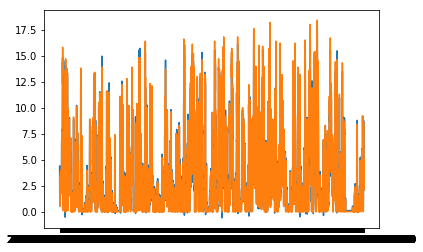

In [7]:
plt.plot(y_pred.iloc[:,0])
plt.plot(y_test.values[:,0])

In [12]:
canela_path = "../../data/processed/x_potency_canela1_merged.csv"

X = pd.read_csv(canela_path,index_col=0).values[:,0]
y_naive_canela = pd.DataFrame(np.repeat(X,12).reshape(-1,12))
y_naive_canela.to_csv("y_naive_canela.csv")

canela_path = "../../data/processed/x_potency_totoral_merged.csv"
X = pd.read_csv(canela_path,index_col=0).values[:,0]
y_naive_totoral = pd.DataFrame(np.repeat(X,12).reshape(-1,12))
y_naive_totoral.to_csv("y_naive_totoral.csv")

canela_path = "../../data/processed/x_potency_monte_redondo_merged.csv"
X = pd.read_csv(canela_path,index_col=0).values[:,0]
y_naive_monte = pd.DataFrame(np.repeat(X,12).reshape(-1,12))
y_naive_monte.to_csv("y_naive_monte.csv")


array([ 10.3,   7.7,   7.2, ...,   5.1,   3.3,   2.1])